In [136]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as xp
from textblob import TextBlob
from plotly.subplots import make_subplots

In [7]:
modi = pd.read_csv(r"C:\Users\bhuvp\Downloads\ModiRelatedTweetsWithSentiment.csv\ModiRelatedTweetsWithSentiment.csv")
rahul = pd.read_csv(r"C:\Users\bhuvp\Downloads\RahulRelatedTweetsWithSentiment.csv\RahulRelatedTweetsWithSentiment.csv")

In [14]:
modi.drop(columns=['Unnamed: 0','Date','Emotion'],inplace=True)

In [15]:
rahul.drop(columns=['Unnamed: 0','Date','Emotion'],inplace=True)

In [51]:
modi.shape

(25683, 2)

In [22]:
rahul.isnull().sum()

User     0
Tweet    0
dtype: int64

In [45]:
modi = modi[~modi['User'].isnull()]

In [50]:
rahul.shape

(14261, 2)

In [66]:
modi

,User,Tweet
0,advosushildixit,@anjanaomkashyap I am seeing you as future #bj...
1,jiaeur,#LokSabhaElections2019 \n23rd May 2019 will re...
2,PVenkatGandhi,#LokSabhaElections2019 \n23rd May 2019 will re...
3,TheNirbhay1,PM Modi creates a new record of being the only...
4,ShakeChilli,@abhijitmajumder Appointment of Successor! \n\...
...,...,...
25683,shv_indian,#1DDrive #ModiSpeaksToNews18 #LokSabhaElection...
25684,SONUPINKOO,I am seriously worried about future of Indian ...
25685,SONUPINKOO,If @narendramodi is so Bad then Why does @INCI...
25686,SONUPINKOO,"On this 23rd March (Pakistan Day), I Urge all ..."


In [75]:
np.sign(TextBlob(modi['Tweet'][0]).sentiment.polarity)

1.0

In [76]:
def find_polarity(text):
    texty = np.sign(TextBlob(text).sentiment.polarity)
    if texty==1.0:
        return 'Positive'
    elif texty==-1.0:
        return 'Negative'
    else:
        return 'Nuteral'

In [86]:
modi['Sentiment'] = modi['Tweet'].apply(find_polarity)

C:\Users\bhuvp\AppData\Local\Temp\ipykernel_18608\81287587.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [87]:
modi

,User,Tweet,Sentiment
0,advosushildixit,@anjanaomkashyap I am seeing you as future #bj...,Positive
1,jiaeur,#LokSabhaElections2019 \n23rd May 2019 will re...,Positive
2,PVenkatGandhi,#LokSabhaElections2019 \n23rd May 2019 will re...,Positive
3,TheNirbhay1,PM Modi creates a new record of being the only...,Positive
4,ShakeChilli,@abhijitmajumder Appointment of Successor! \n\...,Positive
...,...,...,...
25683,shv_indian,#1DDrive #ModiSpeaksToNews18 #LokSabhaElection...,Nuteral
25684,SONUPINKOO,I am seriously worried about future of Indian ...,Positive
25685,SONUPINKOO,If @narendramodi is so Bad then Why does @INCI...,Negative
25686,SONUPINKOO,"On this 23rd March (Pakistan Day), I Urge all ...",Nuteral


In [88]:
rahul['Sentiment'] = rahul['Tweet'].apply(find_polarity)

In [94]:
rahul = rahul[~(rahul['Sentiment']=='Nuteral')]

In [91]:
rahul['Sentiment'].value_counts()

Sentiment
Positive    6195
Nuteral     4894
Negative    3172
Name: count, dtype: int64

In [95]:
modi = modi[~(modi['Sentiment']=='Nuteral')]

In [96]:
rahul

,User,Tweet,Sentiment
0,Sunnysweet16,Wonder why no academic or journalist asks INC ...,Positive
3,JosephPravinP,"@ajaymaken @RahulGandhi And as a final touch, ...",Positive
4,VandanaMegastar,#LokSabhaElections2019 Anyone not having mass ...,Negative
5,RGspeak,@INCIndia should release a video of @RahulGand...,Positive
7,__Shivampandey,"Rahul Gandhi Spotted in Switzerland, 1 hour ag...",Positive
...,...,...,...
14254,SONUPINKOO,@RahulGandhi wants to bring CHANGE in the coun...,Positive
14257,SunjayJK,@AnumaVidisha @RahulGandhi @ArvindKejriwal whe...,Negative
14258,RAMANKAIRA,@sherryontopp Early morning #political move af...,Positive
14259,RAMANKAIRA,@mayankgandhi04 @mallesh_2004 Early morning #p...,Positive


In [104]:
modi

,User,Tweet,Sentiment
0,advosushildixit,@anjanaomkashyap I am seeing you as future #bj...,Positive
1,jiaeur,#LokSabhaElections2019 \n23rd May 2019 will re...,Positive
2,PVenkatGandhi,#LokSabhaElections2019 \n23rd May 2019 will re...,Positive
3,TheNirbhay1,PM Modi creates a new record of being the only...,Positive
4,ShakeChilli,@abhijitmajumder Appointment of Successor! \n\...,Positive
...,...,...,...
25680,CrazySatire,@OpIndia_com Pitroda is blinded by the Modi-ha...,Negative
25681,CrazySatire,Why is a hindutva follower Modi is the most tr...,Positive
25684,SONUPINKOO,I am seriously worried about future of Indian ...,Positive
25685,SONUPINKOO,If @narendramodi is so Bad then Why does @INCI...,Negative


In [101]:
modi.shape[0]-rahul.shape[0]

8115

In [105]:
np.random.seed(10)
num = 8115
delete_indices = np.random.choice(modi.index,num,replace=False)
Modi = modi.drop(delete_indices)

In [108]:
rahul

,User,Tweet,Sentiment
0,Sunnysweet16,Wonder why no academic or journalist asks INC ...,Positive
3,JosephPravinP,"@ajaymaken @RahulGandhi And as a final touch, ...",Positive
4,VandanaMegastar,#LokSabhaElections2019 Anyone not having mass ...,Negative
5,RGspeak,@INCIndia should release a video of @RahulGand...,Positive
7,__Shivampandey,"Rahul Gandhi Spotted in Switzerland, 1 hour ag...",Positive
...,...,...,...
14254,SONUPINKOO,@RahulGandhi wants to bring CHANGE in the coun...,Positive
14257,SunjayJK,@AnumaVidisha @RahulGandhi @ArvindKejriwal whe...,Negative
14258,RAMANKAIRA,@sherryontopp Early morning #political move af...,Positive
14259,RAMANKAIRA,@mayankgandhi04 @mallesh_2004 Early morning #p...,Positive


In [111]:
Modi_count = Modi.groupby(['Sentiment']).count()
neg_Modi = Modi_count['Tweet'][0]*100/9367
pos_Modi = Modi_count['Tweet'][1]*100/9367

In [112]:
Modi_count

,User,Tweet
Sentiment,,
Negative,2735,2735
Positive,6632,6632


In [113]:
rahul_count = rahul.groupby(['Sentiment']).count()
rahul_count

,User,Tweet
Sentiment,,
Negative,3172,3172
Positive,6195,6195


In [121]:
neg_Modi = Modi_count['Tweet'][0]*100/9367
pos_Modi = Modi_count['Tweet'][1]*100/9367

C:\Users\bhuvp\AppData\Local\Temp\ipykernel_18608\2294385628.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\bhuvp\AppData\Local\Temp\ipykernel_18608\2294385628.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [119]:
pos_Modi

6632

In [122]:
neg_rahul = rahul_count['Tweet'][0]*100/9367
pos_rahul = rahul_count['Tweet'][1]*100/9367

C:\Users\bhuvp\AppData\Local\Temp\ipykernel_18608\1372144497.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\bhuvp\AppData\Local\Temp\ipykernel_18608\1372144497.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [135]:
neg_rahul

33.86356357425003

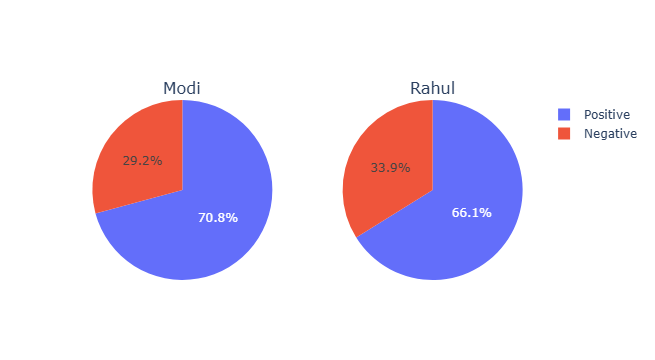

In [147]:
PoliticsPerson = ['Modi','Rahul']
negitivity = [neg_Modi,neg_rahul]
positivity = [pos_Modi,pos_rahul]

fig = make_subplots(rows=1,cols=2,specs=[[{'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=PoliticsPerson)

fig.add_trace(go.Pie(name='Negative',labels=['Positive','Negative'],values=[positivity[0],negitivity[0]]),row=1,col=1),
fig.add_trace(go.Pie(name='Positive',labels=['Positive','Negative'],values=[positivity[1],negitivity[1]]),row=1,col=2)

fig.update_layout()